In [5]:
# Only run this if Dask dataframe query planning is disabled
!pip install dask[dataframe]

In [6]:
# Importing necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from scipy.interpolate import interp1d
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report,auc, confusion_matrix, precision_recall_curve, accuracy_score

In [7]:
# Let's suppress warnings for cleaner outputs
warnings.filterwarnings('ignore')

In [8]:
# Let's load our 'Heart Disease' dataset
#file_path = "/content/heart_disease_health_indicators_BRFSS2015.csv"
file_path = "Datasets\heart_disease_health_indicators_BRFSS2015.csv"
heart_disease_data = pd.read_csv(file_path)


In [9]:
# Now, we inspect first fews rows to verify the that data is loaded correctly
heart_disease_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
# Let's check to see more information about our dataset
print("\nAdditional Info about our Dataset:")
heart_disease_data.info()


Additional Info about our Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth         

In [11]:
# Let's check for null values
print("\nTotal Null Values for each category in our Dataset:")
print(heart_disease_data.isnull().sum())


Total Null Values for each category in our Dataset:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [12]:
# Let us display some summary statistics
print("\nSummary Statistics Describing our Dataset:\n")
print(heart_disease_data.describe())


Summary Statistics Describing our Dataset:

       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.6981

1. Perform Exploratory Data Analysis including univariate analysis to understand the distribution of features.


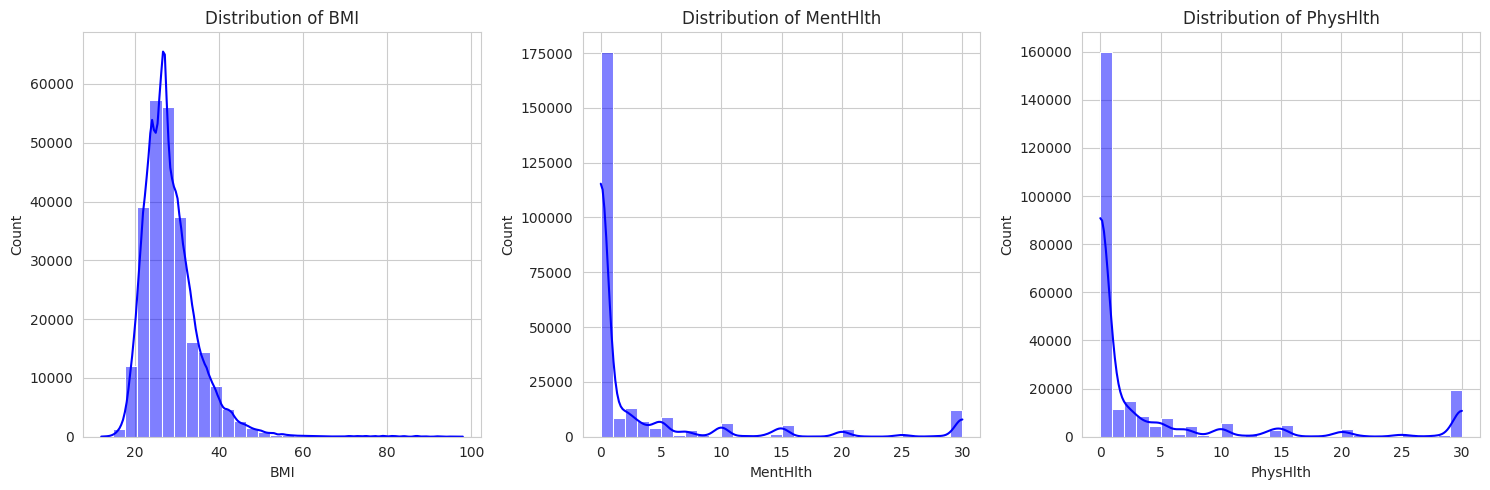

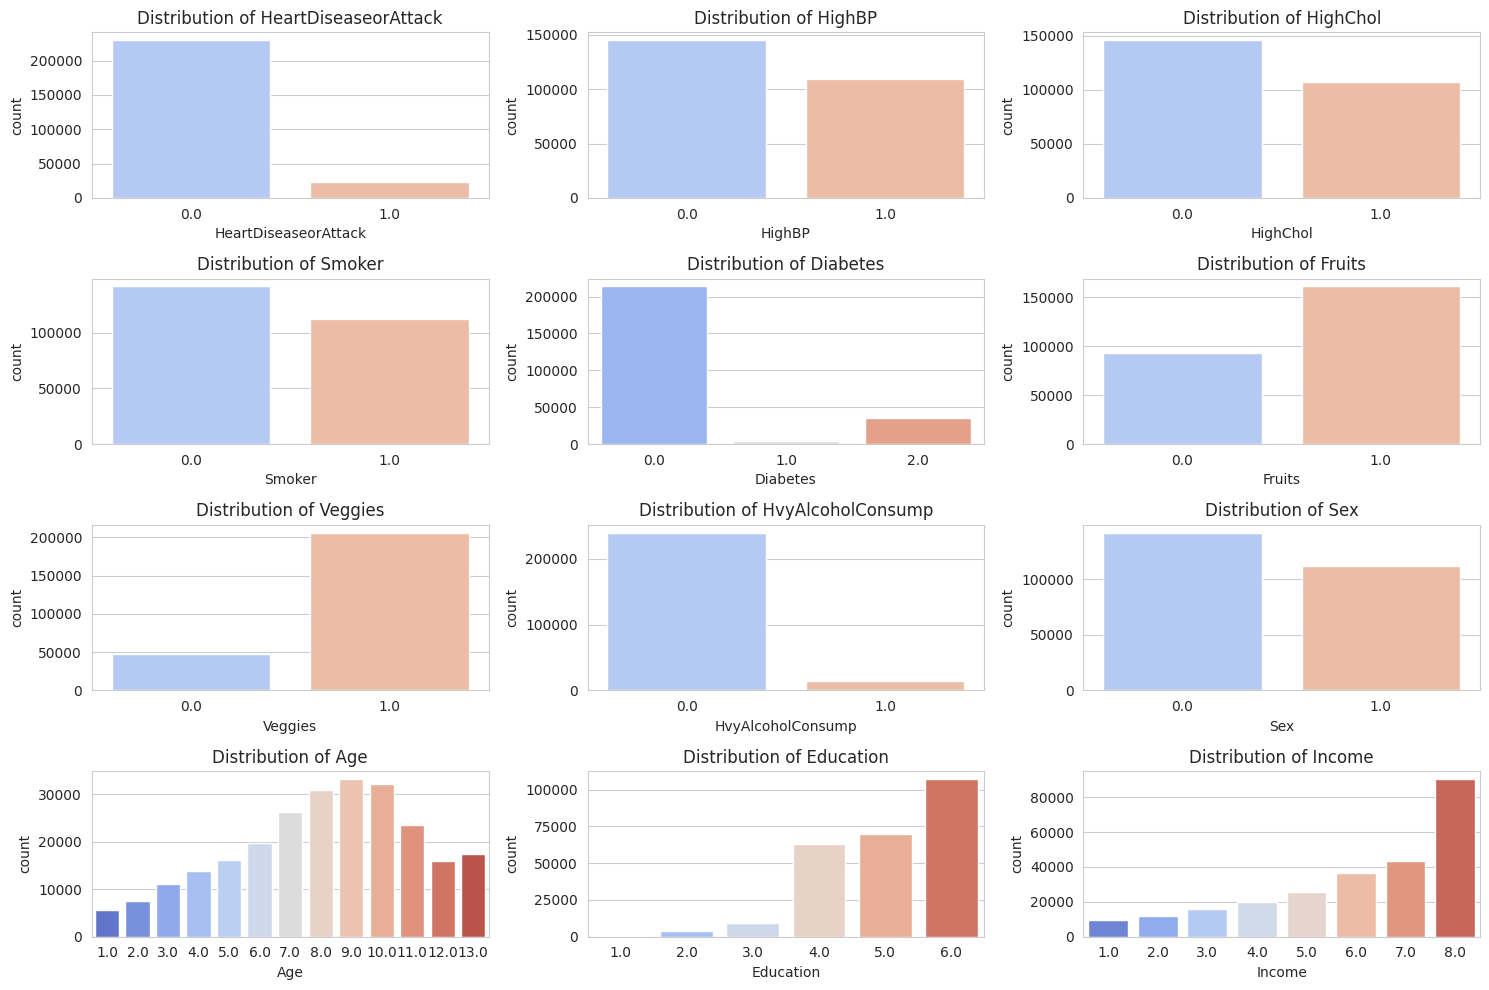

In [13]:
# Let's set the style for our seaborn to "whitegrid"
sns.set_style("whitegrid")

# Let's perform Univariate Analysis: Distribution of Numerical Features
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(heart_disease_data[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Categorical Features
categorical_features = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex', 'Age', 'Education', 'Income']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=heart_disease_data[feature], palette='coolwarm')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

2. Perform Exploratory Data Analysis including multivariate analysis to determine the correlations and analysis of target variables.

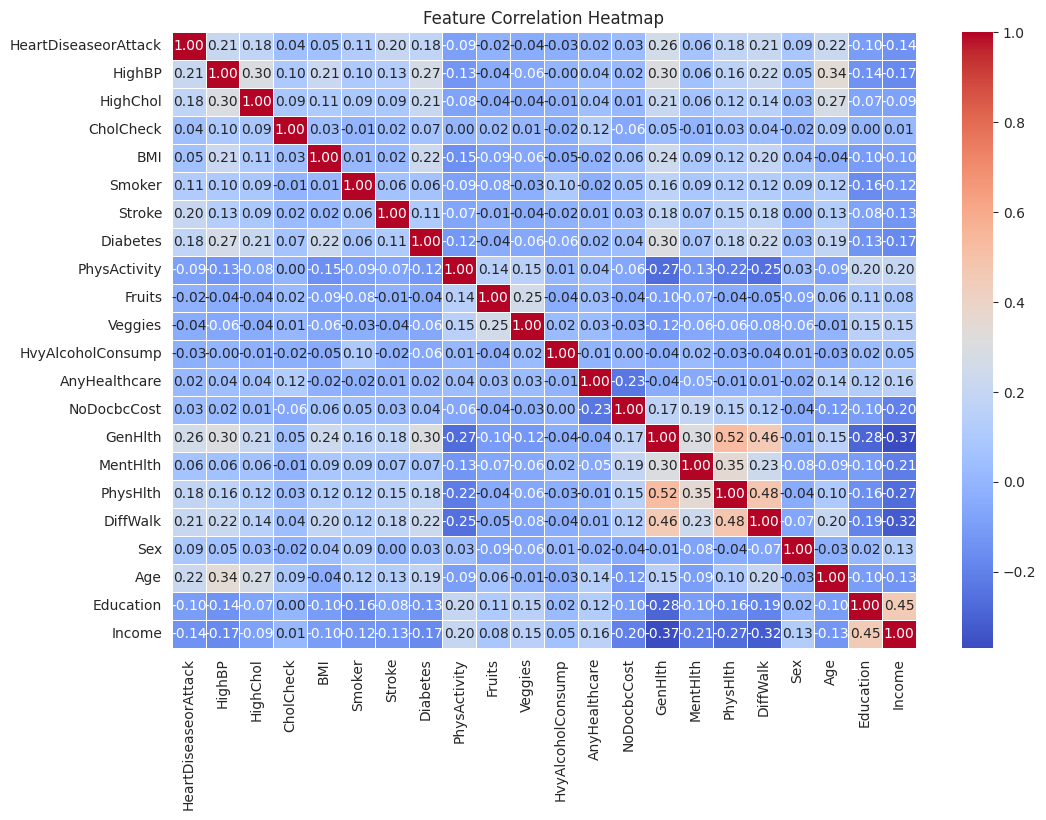

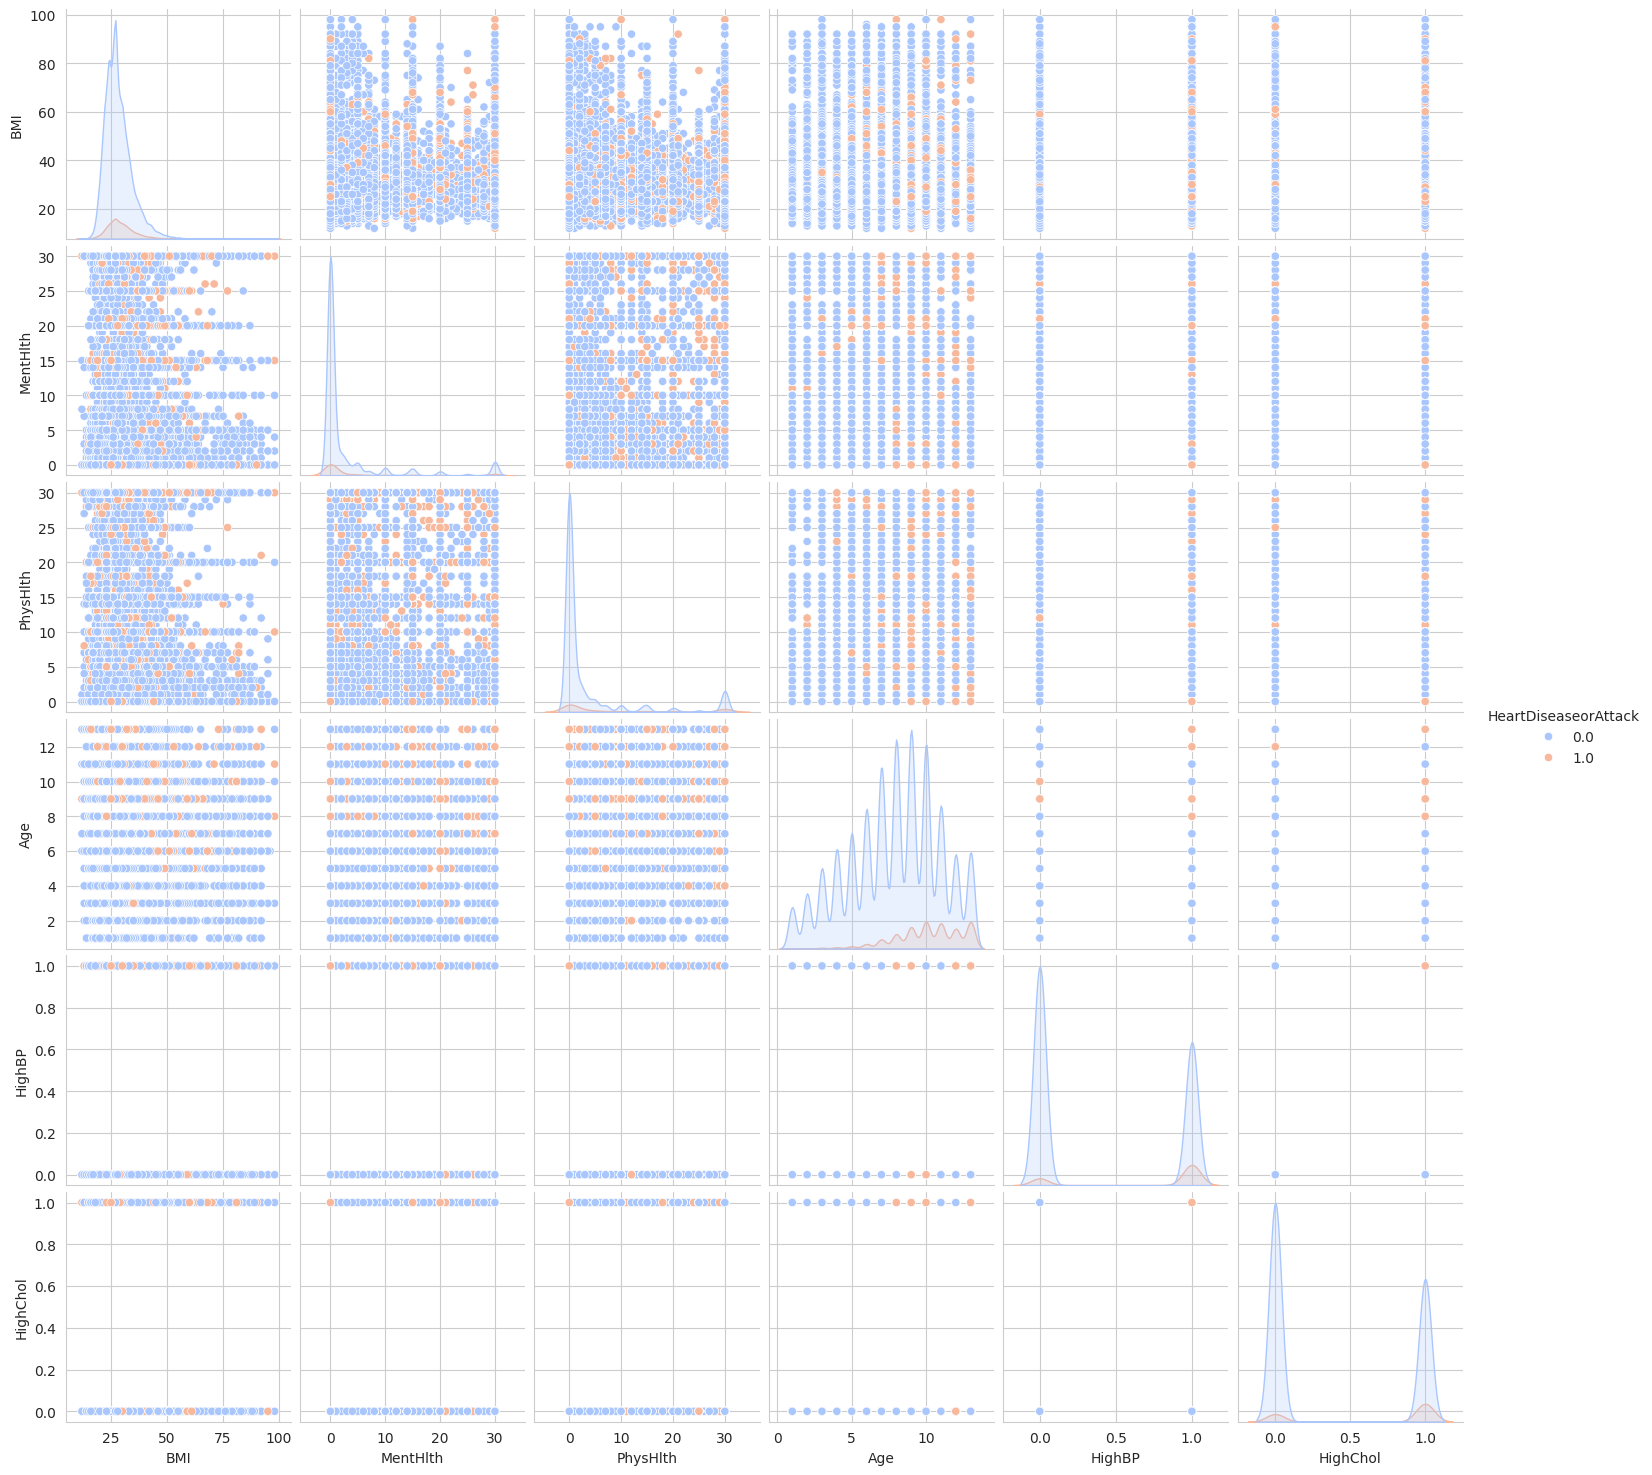

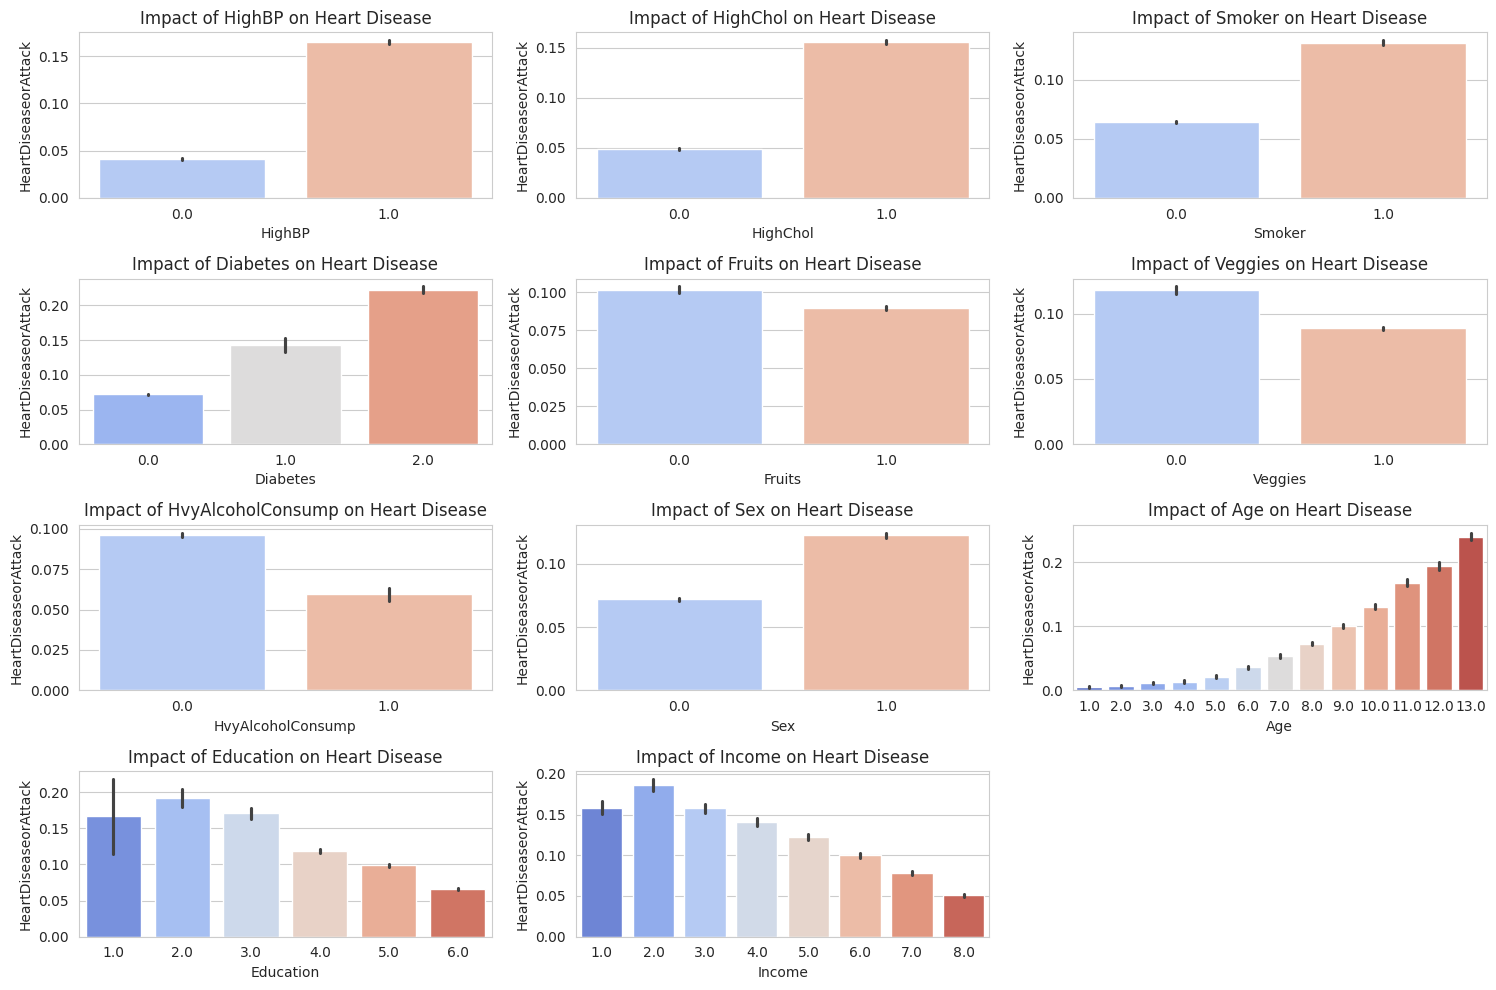

In [14]:
# Let's perform Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = heart_disease_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot of Selected Features
selected_features = ['HeartDiseaseorAttack', 'BMI', 'MentHlth', 'PhysHlth', 'Age', 'HighBP', 'HighChol']
sns.pairplot(heart_disease_data[selected_features], hue='HeartDiseaseorAttack', palette='coolwarm')
plt.show()

# Analyzing Categorical Features Against the Target
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex', 'Age', 'Education', 'Income']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.barplot(x=heart_disease_data[feature], y=heart_disease_data['HeartDiseaseorAttack'], palette='coolwarm')
    plt.title(f'Impact of {feature} on Heart Disease')
plt.tight_layout()
plt.show()

3. Perform Exploratory Data Analysis to determine if new features can be created, based on the given data.

In [15]:
# 1. Let's create a risk score by summing high-risk factors
heart_disease_data['RiskScore'] = heart_disease_data[['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'HvyAlcoholConsump']].sum(axis=1)

# 2. Now, let's transform "Age" categories into a Risk Score
age_mapping = {
    1: 18, 2: 25, 3: 30, 4: 35, 5: 40, 6: 45, 7: 50, 8: 55,
    9: 60, 10: 65, 11: 70, 12: 75, 13: 80
}
heart_disease_data['AgeScore'] = heart_disease_data['Age'].map(age_mapping)

# 3. Creating a Health Distress Score
heart_disease_data['HealthDistress'] = heart_disease_data['MentHlth'] + heart_disease_data['PhysHlth']

# 4. Categorizing BMI into Weight Groups
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25.0 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

heart_disease_data['BMI_Category'] = heart_disease_data['BMI'].apply(categorize_bmi)

# Finally, let's display the first few rows to verify new features
print(heart_disease_data[['RiskScore', 'AgeScore', 'BMI','HealthDistress', 'BMI_Category']].head())


   RiskScore  AgeScore   BMI  HealthDistress BMI_Category
0        3.0        60  40.0            33.0        Obese
1        1.0        50  25.0             0.0   Overweight
2        2.0        60  28.0            60.0   Overweight
3        1.0        70  27.0             0.0   Overweight
4        2.0        70  24.0             3.0       Normal


Now, let's visualize these new features to see their impact.

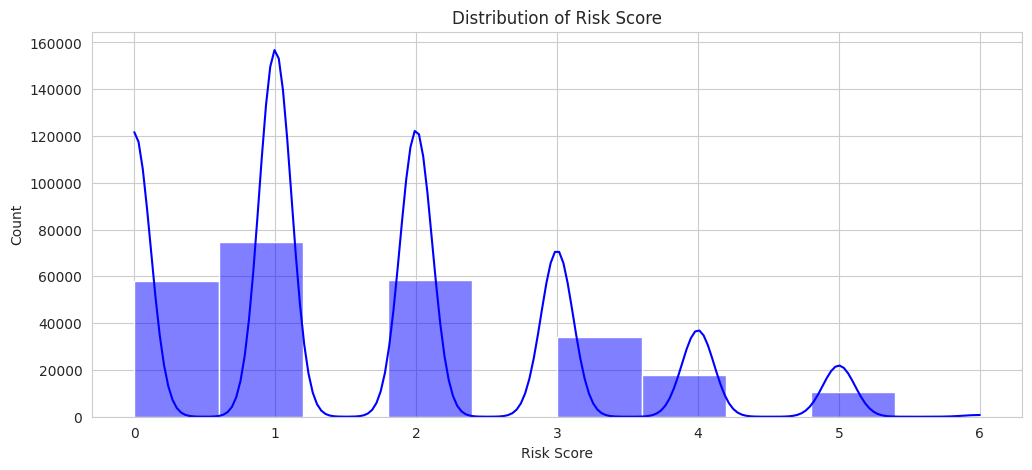

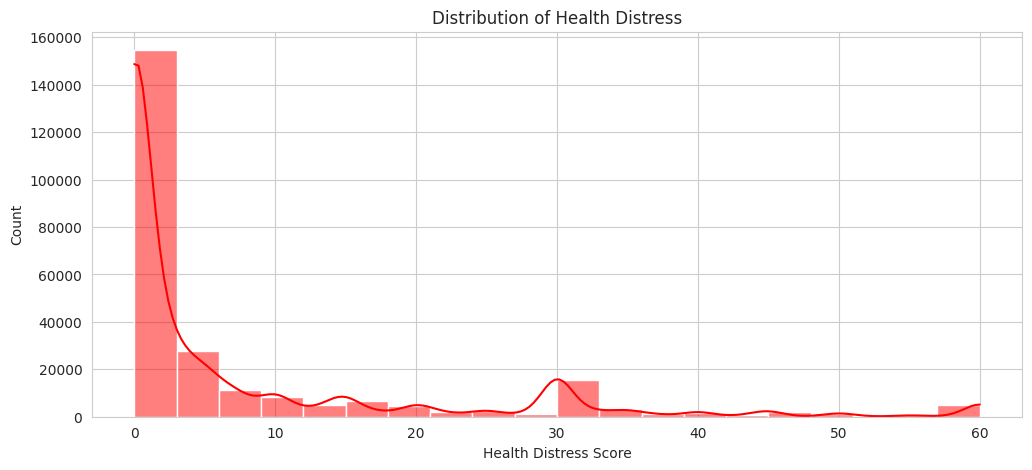

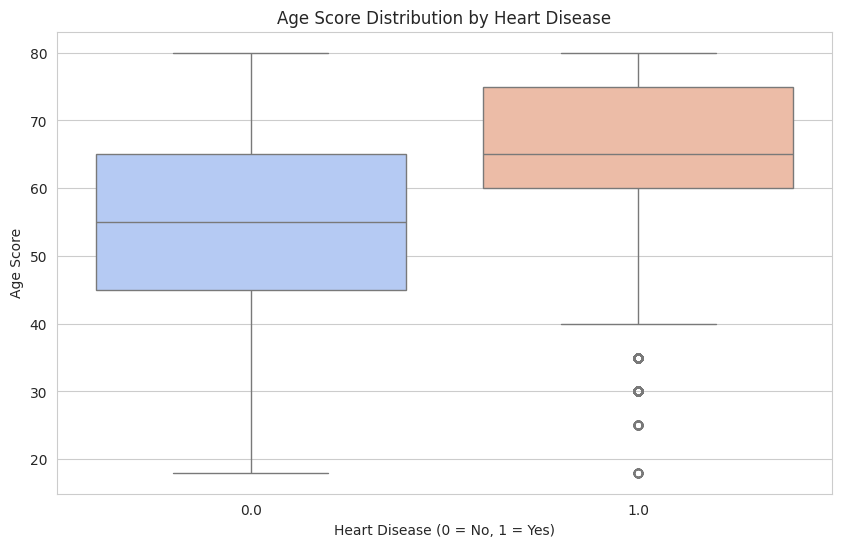

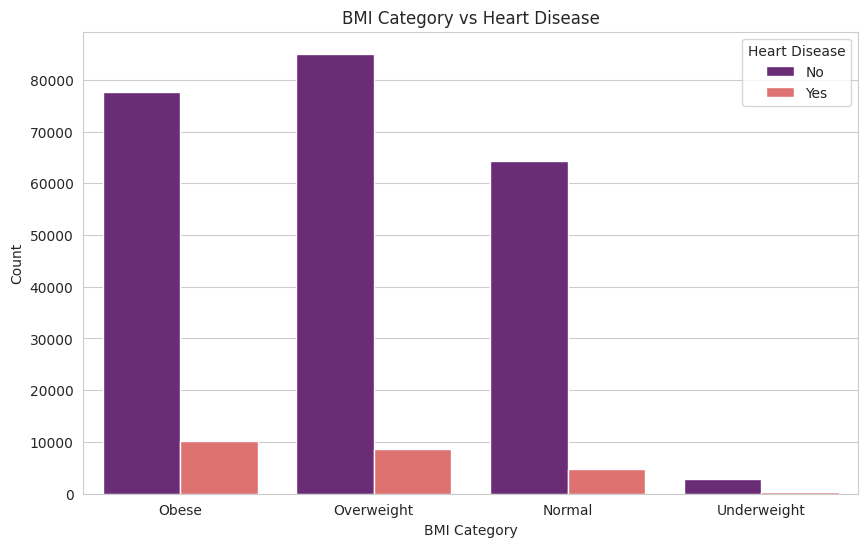

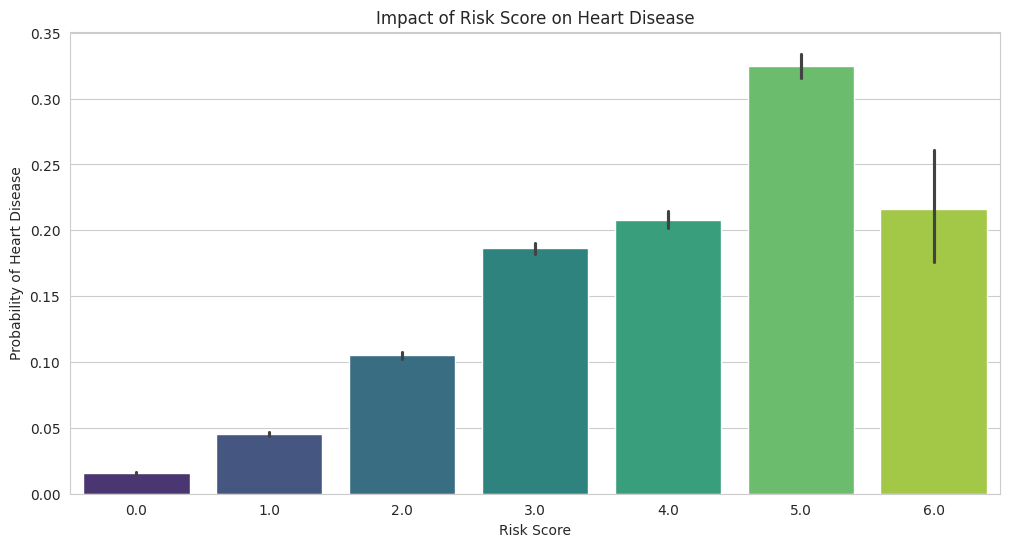

In [16]:
# 1. Distribution of Risk Score
plt.figure(figsize=(12, 5))
sns.histplot(heart_disease_data['RiskScore'], bins=10, kde=True, color="blue")
plt.title("Distribution of Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.show()

# 2. Health Distress Distribution
plt.figure(figsize=(12, 5))
sns.histplot(heart_disease_data['HealthDistress'], bins=20, kde=True, color="red")
plt.title("Distribution of Health Distress")
plt.xlabel("Health Distress Score")
plt.ylabel("Count")
plt.show()

# 3. Boxplot of Age Score vs. Heart Disease
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_disease_data['HeartDiseaseorAttack'], y=heart_disease_data['AgeScore'], palette="coolwarm")
plt.title("Age Score Distribution by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age Score")
plt.show()

# 4. BMI Category vs. Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x=heart_disease_data['BMI_Category'], hue=heart_disease_data['HeartDiseaseorAttack'], palette="magma")
plt.title("BMI Category vs Heart Disease")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

# 5. Risk Score vs. Heart Disease
plt.figure(figsize=(12, 6))
sns.barplot(x=heart_disease_data['RiskScore'], y=heart_disease_data['HeartDiseaseorAttack'], palette="viridis")
plt.title("Impact of Risk Score on Heart Disease")
plt.xlabel("Risk Score")
plt.ylabel("Probability of Heart Disease")
plt.show()


4. Perform Exploratory Data Analysis to layout binary classification experimentation space (i.e. determine the list of models you would like to experiment with).

ANSWER<br />
<u>Objective:</u><br />
  Our goal is to predict heart disease (HeartDiseaseorAttack) as a binary classification problem (0 = No, 1 = Yes), we therefore need to select appropriate models for experimentation. We will implement three major steps:
  <ol>
  <li>Assess Data Characteristics</li>
  <li>Select Candidate Models</li>
  <li>Model Selection Criteria</li>
  </ol>
  <br>
  

Step 1: Checking for Class Imbalance<br>
  We will perform the following tasks:
  <ul>
  <li>Identify class imbalance.</li>
  <li>Determine feature types (numerical, categorical, binary).</li>
  <li>Identify correlations and feature importance.</li>
  </ul>
  Let's get coding!

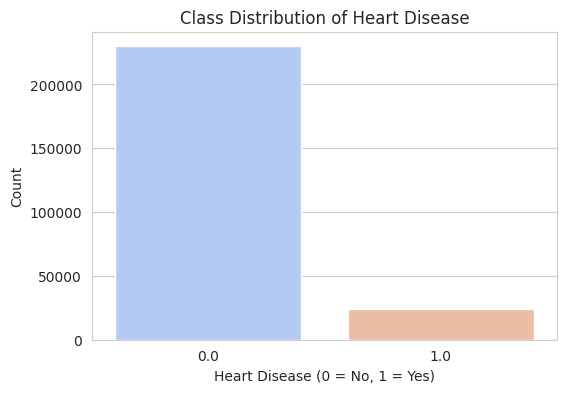

Class Distribution:
HeartDiseaseorAttack
0.0    90.581441
1.0     9.418559
Name: proportion, dtype: float64


In [17]:
# Count plot for target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=heart_disease_data['HeartDiseaseorAttack'], palette="coolwarm")
plt.title("Class Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Print percentage distribution
heart_disease_counts = heart_disease_data['HeartDiseaseorAttack'].value_counts(normalize=True) * 100
print(f"Class Distribution:\n{heart_disease_counts}")


Step 2: Selecting Candidate Models<br>
  We will perform the following tasks:
  <ul>
  <li>Try both linear and non-linear classifiers.</li>
  <li>Include tree-based models to capture complex relationships.</li>
  </ul>

| Model  | Type | Strengths | Challenges                                                                                                                                              |
|:-- | :-------: | :------------------------------------------------------------------------------------------------------------------------------------------------------------- | -----------------|
| Logistic Regression  |  **Linear Model**  | Simple, interpretable | May struggle with non-linearity
| Decision Tree  |  **Non-Linear**  | Easy to interpret, handles interactions | Prone to overfitting                                                                                                                             |
| Random Forest  |  **Ensemble (Bagging)**  | Reduces overfitting, captures complex patterns | Computationally expensive
| XGBoost  |  **Gradient Boosting**  | Simple, interpretable | Requires tuning
| LightGBM  |  **Gradient Boosting**  | Simple, interpretable | May struggle with non-linearity
| Support Vector Machine (SVM)  |  **Kernel-Based**  | Works well for high-dimensional data | Slow on large datasets
| K-Nearest Neighbors (KNN)  |  **Distance-Based**  | Simple, effective for small datasets | Slow on large datasets

Step 3: Evaluating Performance Metrics<br>
  We will perform the following tasks:
  <ul>
  <li>Performance Metrics: Precision, recall, F1-score, AUC-ROC.</li>
  <li>Computational Efficiency: Simpler models for interpretability, complex models for accuracy.</li>
  <li>Class Imbalance Handling: Use techniques like SMOTE if needed.</li>
  </ul>
  

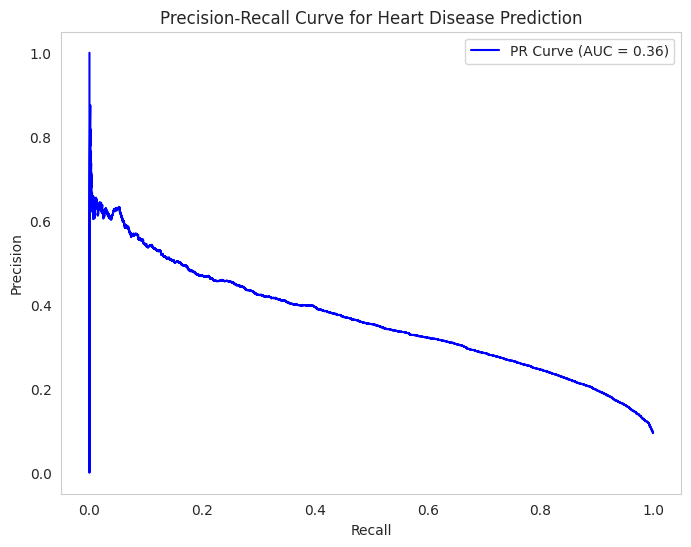

Best Threshold for Classification: 0.916


In [18]:
# Train our dataset on Logistic Regression
# Define feature (X) and target variable (y)
X = heart_disease_data.drop(columns=['HeartDiseaseorAttack'])
y = heart_disease_data['HeartDiseaseorAttack']

# To encode features, we identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Get prediction probabilities
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (heart disease)

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC-PR)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Heart Disease Prediction')
plt.legend()
plt.grid()
plt.show()

# Find the best threshold (maximize F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f'Best Threshold for Classification: {best_threshold:.3f}')



Training Logistic Regression...

Performance Metrics for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.99      0.54      0.70     45957
         1.0       0.17      0.93      0.29      4779

    accuracy                           0.58     50736
   macro avg       0.58      0.74      0.50     50736
weighted avg       0.91      0.58      0.66     50736



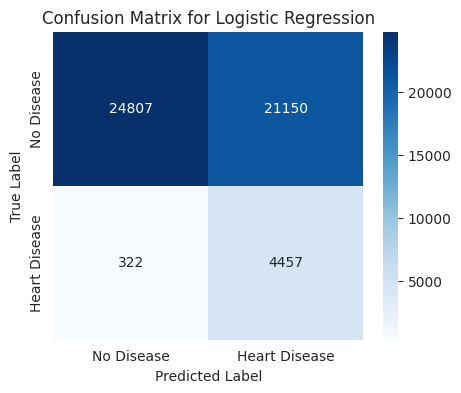


Training Decision Tree...

Performance Metrics for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91     45957
         1.0       0.24      0.29      0.26      4779

    accuracy                           0.85     50736
   macro avg       0.58      0.60      0.59     50736
weighted avg       0.86      0.85      0.85     50736



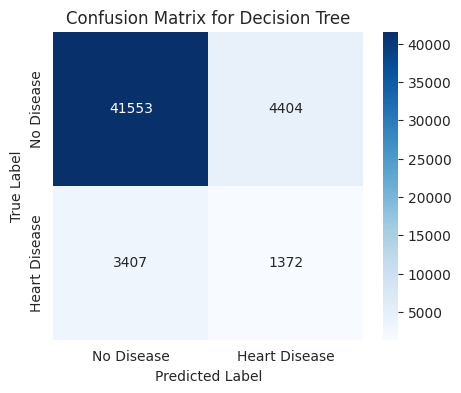


Training Random Forest...

Performance Metrics for Random Forest:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91     45957
         1.0       0.31      0.48      0.38      4779

    accuracy                           0.85     50736
   macro avg       0.63      0.69      0.65     50736
weighted avg       0.88      0.85      0.86     50736



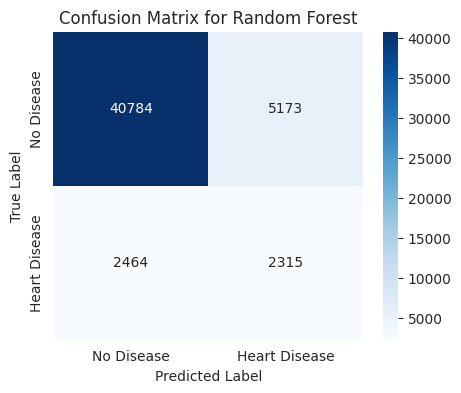


Training XGBoost...

Performance Metrics for XGBoost:
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     45957
         1.0       0.35      0.49      0.41      4779

    accuracy                           0.87     50736
   macro avg       0.65      0.70      0.67     50736
weighted avg       0.89      0.87      0.88     50736



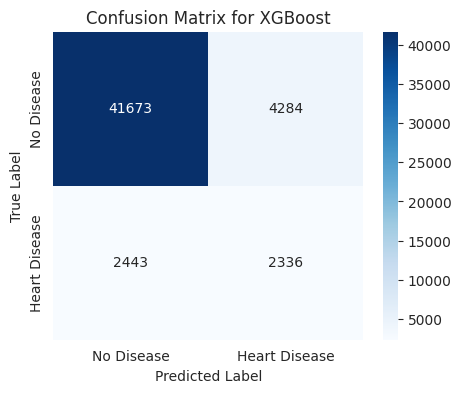

In [19]:
#Train the above-mentioned models and evaluate their performance on our dataset.
# Let's handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}
# LightGBM, SVM and KNN seem to take too much time and so were omitted in the training

# Best threshold determined from Precision-Recall Curve
best_threshold = 0.253  # This is obtained from subsequent work; particularly Task 5

# Train models and apply threshold
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train_resampled)

    # Get prediction probabilities (except for Decision Tree, which needs to be converted)
    y_scores = model.predict_proba(X_test_scaled)[:, 1]

    # Apply best threshold
    y_pred_thresholded = (y_scores >= best_threshold).astype(int)

    # Evaluate the model
    print(f"\nPerformance Metrics for {name}:")
    print(classification_report(y_test, y_pred_thresholded))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_thresholded)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()


5.  Use precision-recall curves to determine best threshold.



Training Logistic Regression...
Best Threshold for Logistic Regression: 0.673
PR AUC for Logistic Regression: 0.362

Training Decision Tree...
Best Threshold for Decision Tree: 0.364
PR AUC for Decision Tree: 0.292

Training Random Forest...
Best Threshold for Random Forest: 0.213
PR AUC for Random Forest: 0.295

Training XGBoost...
Best Threshold for XGBoost: 0.237
PR AUC for XGBoost: 0.357


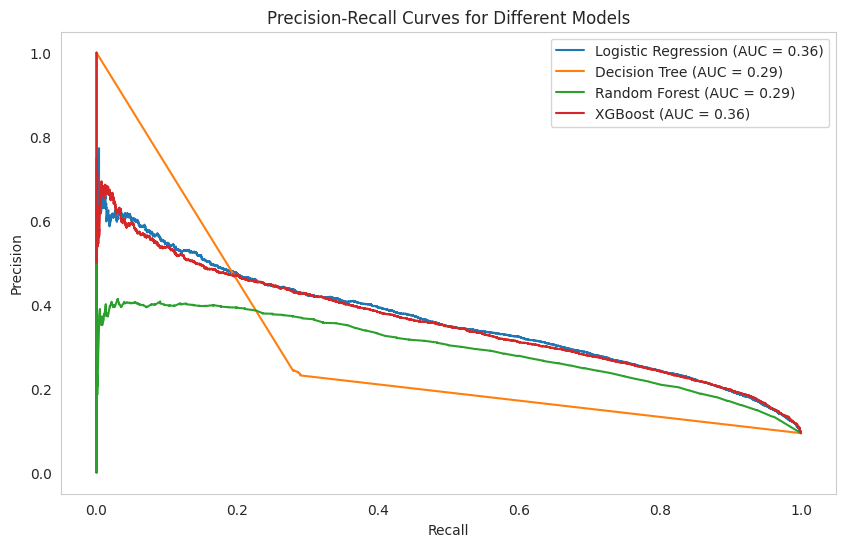


Best Thresholds for Each Model:
Logistic Regression: 0.673
Decision Tree: 0.364
Random Forest: 0.213
XGBoost: 0.237

Best Overall Threshold Across Models: 0.253


In [20]:
# To apply Label Encoding, we identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convert categorical values into numeric
    label_encoders[col] = le  # Save encoders for later use

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Initialize plot
plt.figure(figsize=(10, 6))

best_thresholds = {}
f1_scores_at_thresholds = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train_resampled)

    # Get prediction probabilities
    y_scores = model.predict_proba(X_test_scaled)[:, 1]

    # Compute precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

    # Compute AUC-PR
    pr_auc = auc(recall, precision)

    # Compute F1-score at each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores[np.isnan(f1_scores)] = 0  # To handle division by zero

    # Find the best threshold for this model
    best_threshold = thresholds[np.argmax(f1_scores)]
    best_thresholds[name] = best_threshold
    f1_scores_at_thresholds[name] = (thresholds, f1_scores)

    # Plot PR curve
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')

    print(f"Best Threshold for {name}: {best_threshold:.3f}")
    print(f"PR AUC for {name}: {pr_auc:.3f}")

# Use a fixed set of thresholds for interpolation
fixed_thresholds = np.linspace(0, 1, 100)
average_f1_scores = np.zeros_like(fixed_thresholds)

for model in models:
    model_thresholds, model_f1_scores = f1_scores_at_thresholds[model]

    # To ensure thresholds are strictly increasing before interpolation
    sorted_indices = np.argsort(model_thresholds)
    sorted_thresholds = model_thresholds[sorted_indices]
    sorted_f1_scores = model_f1_scores[sorted_indices]

    # Interpolate F1 scores to match the fixed set of thresholds
    interpolation_function = interp1d(sorted_thresholds, sorted_f1_scores, kind='linear', fill_value="extrapolate")
    interpolated_f1_scores = interpolation_function(fixed_thresholds)

    # Summing up the interpolated F1 scores
    average_f1_scores += interpolated_f1_scores

# Normalize by the number of models
average_f1_scores /= len(models)

# Select the best overall threshold based on the highest averaged F1-score
best_overall_threshold = fixed_thresholds[np.argmax(average_f1_scores)]

# Finalize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend()
plt.grid()
plt.show()

# Print Best Thresholds
print("\nBest Thresholds for Each Model:")
for model, threshold in best_thresholds.items():
    print(f"{model}: {threshold:.3f}")

print(f"\nBest Overall Threshold Across Models: {best_overall_threshold:.3f}")


6. List out the most important drivers of heart disease or attack.

We will determine the most critical features contributing to heart disease or attack using feature importance from tree-based models and feature coefficients from Logistic Regression.<br>
**Approach**
<ol>
    <li>Use Feature Importance from Tree-Based Models</li>
<ul>
    <li>Random Forest and XGBoost naturally provide feature importance scores.</li>
    <li>Features with higher importance scores contribute more to predictions.</li>
</ul>
<li>Use Coefficients from Logistic Regression</li>

<ul>
  <li>Logistic Regression provides weights for each feature.</li>
</ul>
</ol>

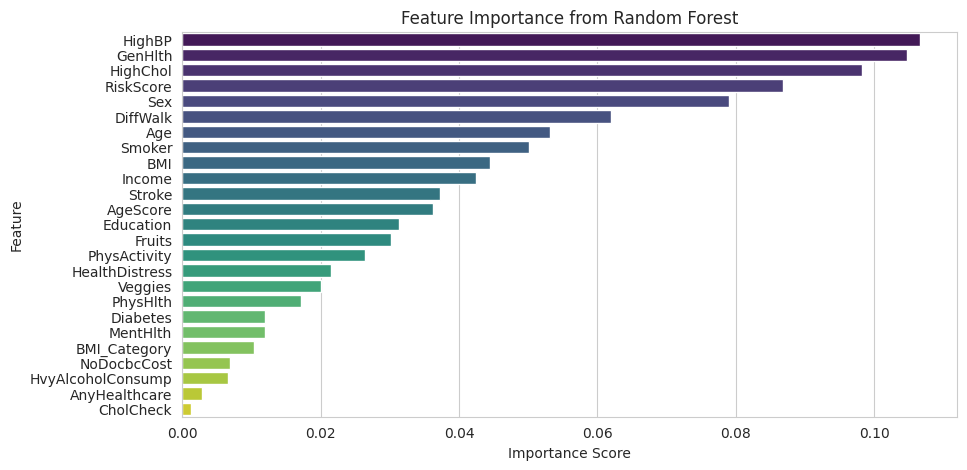

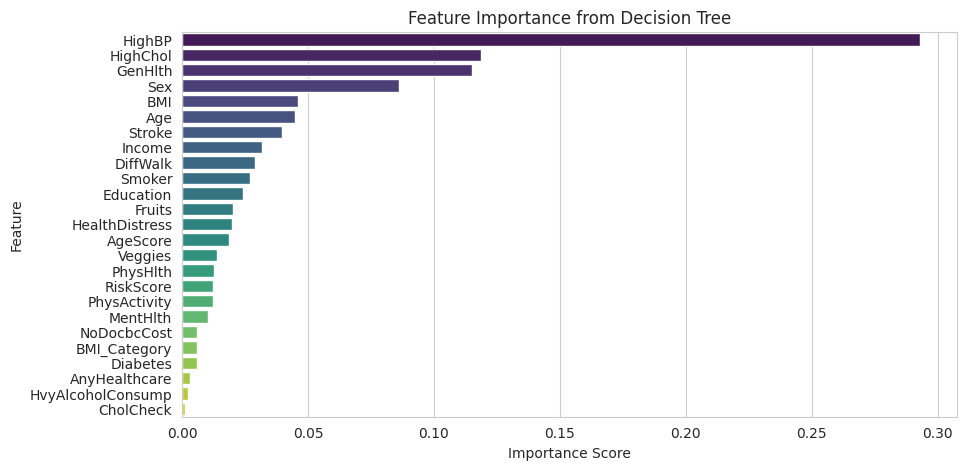

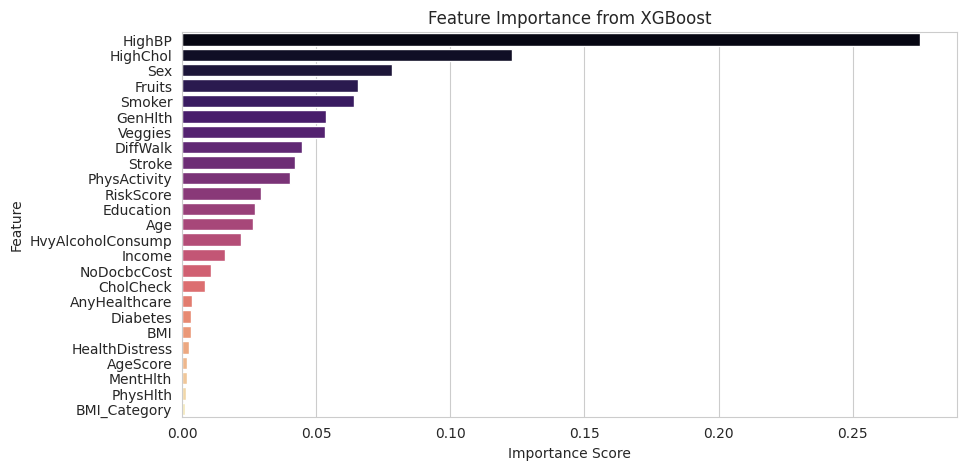

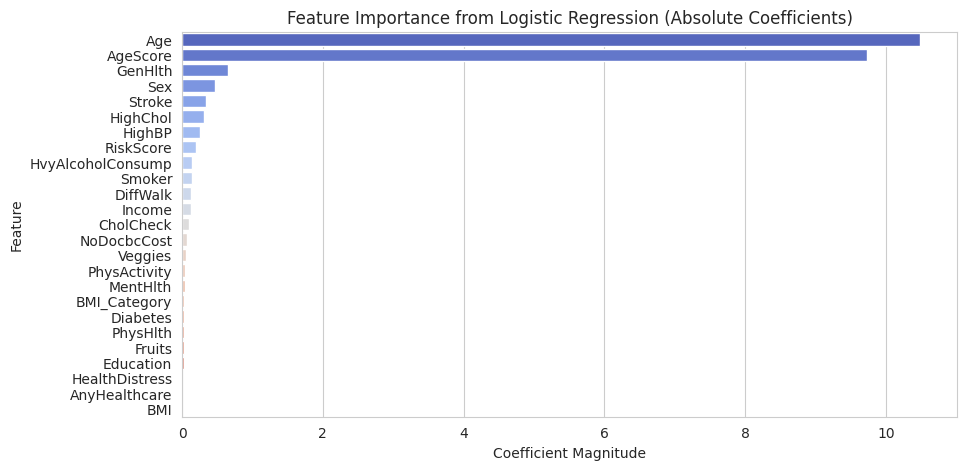


Top 10 Features from Logistic Regression:
              Feature  Coefficient  Abs_Coefficient
18                Age    10.486348        10.486348
22           AgeScore    -9.730641         9.730641
13            GenHlth     0.654037         0.654037
17                Sex     0.467915         0.467915
5              Stroke     0.335848         0.335848
1            HighChol     0.311048         0.311048
0              HighBP     0.254949         0.254949
21          RiskScore     0.197645         0.197645
10  HvyAlcoholConsump    -0.142355         0.142355
4              Smoker     0.139273         0.139273

Top 10 Features from Random Forest:
      Feature  Importance
0      HighBP    0.106601
13    GenHlth    0.104662
1    HighChol    0.098219
21  RiskScore    0.086733
17        Sex    0.078994
16   DiffWalk    0.061991
18        Age    0.053173
4      Smoker    0.050149
3         BMI    0.044409
20     Income    0.042458

Top 10 Features from Decision Tree:
     Feature  Importance


In [21]:
# Train Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train_resampled)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train_resampled)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train_resampled)


# Get coefficients from Logistic Regression
log_reg_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg_model.coef_[0]})
log_reg_coefficients['Abs_Coefficient'] = abs(log_reg_coefficients['Coefficient'])
log_reg_coefficients = log_reg_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Get feature importance from Decision Tree
dt_importance = dt_model.feature_importances_
dt_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_importance})
dt_feature_importance = dt_feature_importance.sort_values(by='Importance', ascending=False)

# Get feature importance from Random Forest
rf_importance = rf_model.feature_importances_
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importance})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

# Get feature importance from XGBoost
xgb_importance = xgb_model.feature_importances_
xgb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importance})
xgb_feature_importance = xgb_feature_importance.sort_values(by='Importance', ascending=False)


# Plot feature importance (Random Forest)
plt.figure(figsize=(10, 5))
sns.barplot(x=rf_feature_importance['Importance'], y=rf_feature_importance['Feature'], palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Plot feature importance (Decision Tree)
plt.figure(figsize=(10, 5))
sns.barplot(x=dt_feature_importance['Importance'], y=dt_feature_importance['Feature'], palette="viridis")
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Plot feature importance (XGBoost)
plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_feature_importance['Importance'], y=xgb_feature_importance['Feature'], palette="magma")
plt.title("Feature Importance from XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Plot feature importance (Logistic Regression Coefficients)
plt.figure(figsize=(10, 5))
sns.barplot(x=log_reg_coefficients['Abs_Coefficient'], y=log_reg_coefficients['Feature'], palette="coolwarm")
plt.title("Feature Importance from Logistic Regression (Absolute Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

# Print top features from each model
print("\nTop 10 Features from Logistic Regression:")
print(log_reg_coefficients.head(10))

print("\nTop 10 Features from Random Forest:")
print(rf_feature_importance.head(10))

print("\nTop 10 Features from Decision Tree:")
print(dt_feature_importance.head(10))

print("\nTop 10 Features from XGBoost:")
print(xgb_feature_importance.head(10))


7. Use techniques such as oversampling, undersampling to handle class-imbalance.

**Techniques to Handle Class Imbalance**
<ol>
  <li>Oversampling (SMOTE - Synthetic Minority Over-sampling Technique)</li>
  <ul>
    <li>Generates synthetic examples for the minority class.</li>
    <li>Helps prevent information loss.</li>
  </ul>
  <li>Undersampling</li>
    <ul>
    <li>Randomly removes majority class samples.</li>
    <li>Reduces dataset size but can lead to information loss.</li>
  </ul>
  <li>Combination of SMOTE & Undersampling (SMOTEENN or SMOTETomek)</li>
    <ul>
    <li>Uses SMOTE to oversample the minority class.</li>
    <li>Uses Tomek Links or Edited Nearest Neighbors (ENN) to remove noisy majority samples.</li>
  </ul>
</ol>

Class Distribution Before Balancing: Counter({0.0: 183830, 1.0: 19114})
Class Distribution After SMOTE: Counter({0.0: 183830, 1.0: 183830})
Class Distribution After Undersampling: Counter({0.0: 38228, 1.0: 19114})
Class Distribution After SMOTEENN: Counter({1.0: 178117, 0.0: 125614})


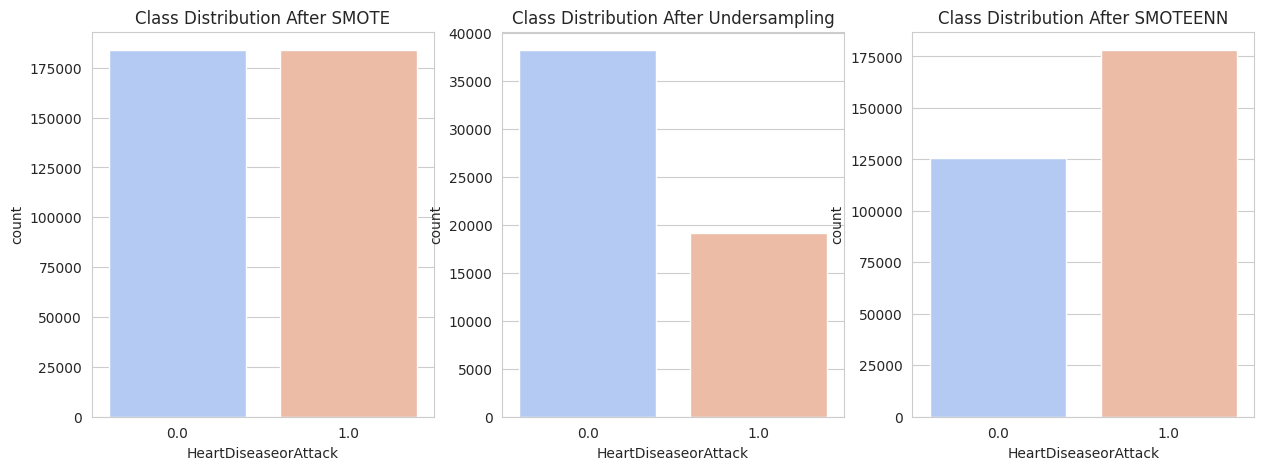

In [22]:
# Print class distribution before balancing
print("Class Distribution Before Balancing:", Counter(y_train))

### **1. Oversampling with SMOTE**
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class Distribution After SMOTE:", Counter(y_train_smote))

### **2. Undersampling**
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("Class Distribution After Undersampling:", Counter(y_train_under))

### **3. SMOTE + Undersampling (SMOTEENN)**
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)
print("Class Distribution After SMOTEENN:", Counter(y_train_smoteenn))

# Plot class distributions after resampling
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# SMOTE
sns.countplot(x=y_train_smote, ax=ax[0], palette="coolwarm")
ax[0].set_title("Class Distribution After SMOTE")

# Undersampling
sns.countplot(x=y_train_under, ax=ax[1], palette="coolwarm")
ax[1].set_title("Class Distribution After Undersampling")

# SMOTEENN
sns.countplot(x=y_train_smoteenn, ax=ax[2], palette="coolwarm")
ax[2].set_title("Class Distribution After SMOTEENN")

plt.show()


In [23]:
!pip install --upgrade scikit-learn imbalanced-learn


8.Additional: Using model pipeline to create end to end training and inference pipelines.

In [24]:
# Apply SMOTE only on the training data BEFORE the pipeline
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("Class Distribution After SMOTE:", Counter(y_train_resampled))

# Identify numerical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define preprocessing steps (Scaling)
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features)
])

# Define models for pipeline
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train each model using standard Pipeline (without SMOTE inside)
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Create standard sklearn Pipeline (Preprocessing + Model)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train pipeline using resampled data
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Make predictions on test data
    y_pred = pipeline.predict(X_test)

    # Evaluate performance
    print(f"\nPerformance Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.3f}")


Class Distribution After SMOTE: Counter({0.0: 183830, 1.0: 183830})

Training Logistic Regression...

Performance Metrics for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85     45957
         1.0       0.25      0.78      0.38      4779

    accuracy                           0.76     50736
   macro avg       0.61      0.77      0.62     50736
weighted avg       0.90      0.76      0.81     50736

Accuracy Score: 0.759

Training Random Forest...

Performance Metrics for Random Forest:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     45957
         1.0       0.40      0.14      0.20      4779

    accuracy                           0.90     50736
   macro avg       0.66      0.56      0.58     50736
weighted avg       0.87      0.90      0.88     50736

Accuracy Score: 0.899
